# News Title Classification

In this notebook, I want to classify the news into several categories. The goal is to identify whether a headline is belong to 1 of 4 classes:
- Entertaiment
- Business
- Technology
- Medical

To achieve the goal I will use Multinomial Naïve Bayes and Linear Support Vector Machine.  Naïve Bayes is an algorithm based on applying Bayes theorem with a strong (naive) assumption. They’re probabilistic classifier, therefore will calculate the probability of each category using Bayes theorem then the category with the highest probability will be the output. Linear Support Vector Machine is a linear model for classification and regression problems. The idea of SVM is really simple: creates a line or a hyperplane which separates the data into several categories.
I will use a conventional method here like Countvectorizer to convert document to vector. After that I will use Tfidftransformer to compute tf-idf or “Terms frequency times inverse documents frequency” 
Then the workflow to classificate our document is:

1. **Data Import**:

Data is the lifeblood of predictive analysis. We should know which data that we’ll use, where & how to gather them, then how to make it useful to solve our problem.

2. **Data Cleaning**:

Then we’ll use several mechanism like lowercasing the document, remove short form, and finally remove the punctuation and symbols.

3. **Data Pre-Processing**:

After that we using countvectorizer to convert our document into a vector then using tf-idf transformer to compute tf-idf for every document.

4. **Data Modelling**:

Finally we using 2 model to classificate our documents ( Multinomial Naïve Bayes and Linear-SVM).

5. **Result Discussion**

Discuss the final result (You will see in the end of the notebook)

**=========================================================================================================================**

**=========================================================================================================================**

So here is the code:
1. **Import the library**

Importing the library that we need to process our document and build our model

In [1]:
import pandas as pd
import nltk
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

2. **Read the document**

Read the document using pandas library then convert it into dataframe

In [2]:
news =  pd.read_excel("News Title.xls")

In [3]:
news.head()

,No,News Title,Category
0,1,Google+ rolls out 'Stories' for tricked out ph...,Technology
1,2,Dov Charney's Redeeming Quality,Business
2,3,White God adds Un Certain Regard to the Palm Dog,Entertainment
3,4,"Google shows off Androids for wearables, cars,...",Technology
4,5,China May new bank loans at 870.8 bln yuan,Business


3. **Create a dictionary**

Creating a dictionary that convert abbreviation into full form.

In [4]:
short_forms_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", 
                    "cause": "because", "could've": "could have", "couldn't": "could not", 
                    "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
                    "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", 
                    "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", 
                    "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
                    "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", 
                    "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", 
                    "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", 
                    "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", 
                    "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not",
                    "mightn't've": "might not have", "must've": "must have", "mustn't": "must not", 
                    "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have",
                    "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", 
                    "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", 
                    "she'd": "she would", "she'd've": "she would have", "she'll": "she will", 
                    "she'll've": "she will have", "she's": "she is", "should've": "should have", 
                    "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have",
                    "so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", 
                    "that's": "that is", "there'd": "there would", "there'd've": "there would have", 
                    "there's": "there is", "here's": "here is","they'd": "they would", 
                    "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", 
                    "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", 
                    "we'd": "we would", "we'd've": "we would have", "we'll": "we will", 
                    "we'll've": "we will have", "we're": "we are", "we've": "we have", 
                    "weren't": "were not", "what'll": "what will", "what'll've": "what will have", 
                    "what're": "what are",  "what's": "what is", "what've": "what have", 
                    "when's": "when is", "when've": "when have", "where'd": "where did", 
                    "where's": "where is", "where've": "where have", "who'll": "who will", 
                    "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", 
                    "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", 
                    "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", 
                    "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have",
                    "y'all're": "you all are","y'all've": "you all have","you'd": "you would", 
                    "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", 
                    "you're": "you are", "you've": "you have"}

4. **Convert the Abbrevation**

Converting the abbrevation into full form

In [5]:
for i in range(len(news)):
    text = news.loc[i,"News Title"]
    for word in short_forms_dict.keys():
        if re.search(word,text):
            text = re.sub(word,short_forms_dict[word],text)
    news.loc[i,"News Title"] = text
news.head()

,No,News Title,Category
0,1,Google+ rolls out 'Stories' for tricked out ph...,Technology
1,2,Dov Charney's Redeeming Quality,Business
2,3,White God adds Un Certain Regard to the Palm Dog,Entertainment
3,4,"Google shows off Androids for wearables, cars,...",Technology
4,5,China May new bank loans at 870.8 bln yuan,Business


5. **Create a list of symbols and punctuation**

In [6]:
symbols = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|',';', "'", '$', '&', '/', '[', ']', '>', '%', '=', 
           '#', '*', '+', '\\', '•',  '~', '@', '£', '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', 
           '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', '“', '★', '”', '–', '●', 'â', '►', 
           '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', '▒', '：', 
           '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', 
           '‘', '∞', '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', 
           '¹', '≤', '‡', '√' ]

6. **Remove the symbols and punctuation**

In [7]:
for i in range(len(news)):
    text = news.loc[i,"News Title"]
    for symbol in symbols:
        text = text.replace(symbol,'')
    news.loc[i,"News Title"] = text
news.head()

,No,News Title,Category
0,1,Google rolls out Stories for tricked out photo...,Technology
1,2,Dov Charneys Redeeming Quality,Business
2,3,White God adds Un Certain Regard to the Palm Dog,Entertainment
3,4,Google shows off Androids for wearables cars TVs,Technology
4,5,China May new bank loans at 8708 bln yuan,Business


7. **Encode the category/class**

In [8]:
encoder = LabelEncoder()
y = encoder.fit_transform(news['Category'])
print(y[:5])

[3 0 1 3 0]


8. **Show the number of the news**

In [9]:
categories = news['Category']
titles = news['News Title']
N = len(titles)
print('Number of news',N)

Number of news 65535


In [10]:
labels = list(set(categories))
print('possible categories',labels)

possible categories ['Entertainment', 'Business', 'Medical', 'Technology']


9. **Show the number of the news for every class/category**

In [11]:
for l in labels:
    print('number of ',l,'news',len(news.loc[news['Category'] == l]))

number of  Entertainment news 23961
number of  Business news 17707
number of  Medical news 7091
number of  Technology news 16776


In [12]:
encoder = LabelEncoder()
ncategories = encoder.fit_transform(categories)

10. **Split the document into test-training part**

Split the whole document into 2 parts (test parts and training parts)
The ratio between those 2 parts is 1 : 9 or 10% : 90%
The reason why the percentage of the test parts just 10 % because the quantity of the documents is huge.

In [13]:
Ntrain = int(N * 0.9)
from sklearn.utils import shuffle
titles, ncategories = shuffle(titles, ncategories, random_state=0)

In [14]:
X_train = titles[:Ntrain]
print('X_train.shape',X_train.shape)
y_train = ncategories[:Ntrain]
print('y_train.shape',y_train.shape)
X_test = titles[Ntrain:]
print('X_test.shape',X_test.shape)
y_test = ncategories[Ntrain:]
print('y_test.shape',y_test.shape)

X_train.shape (58981,)
y_train.shape (58981,)
X_test.shape (6554,)
y_test.shape (6554,)


11. **Create a pipeline**

Then i want to create a pipeline to convert every word into vector using countvectorizer then compute tf-idf 
using tf-idf transformizer then predict using multinomial NB and Linear SVM

In [15]:
print('Training1...')
text_clf1 = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer(use_idf=True)),('clf', MultinomialNB())])
print('Training2...')
text_clf2 = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer(use_idf=True)),('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None))])

Training1...
Training2...


12. **Model Training**

Then i want to train both model using training data 

In [16]:
text_clf1 = text_clf1.fit(X_train, y_train)
text_clf2 = text_clf2.fit(X_train, y_train)

13. **Prediction Process**

After that i want to predict the data test using the model that we already trained

In [17]:
print('Predicting...')
predicted1 = text_clf1.predict(X_test)
predicted2 = text_clf2.predict(X_test)

Predicting...


14. **Compute the accuration of the Multinomial-NB and Linear-SVM**

In [18]:
print('Accuracy_score of Multinomial-NB: '+str(round(metrics.accuracy_score(y_test,predicted1)*100,2))+' %')
print('Accuracy_score of Linear SVM    : '+str(round(metrics.accuracy_score(y_test,predicted2)*100,2))+' %')

Accuracy_score of Multinomial-NB: 89.95 %
Accuracy_score of Linear SVM    : 82.93 %


15. **Show Classification Report**

A Classification report is used to measure the quality of predictions from a classification algorithm. How many predictions are True and how many are False. More specifically, True Positives, False Positives, True negatives and False Negatives

In [19]:
print(metrics.classification_report(y_test, predicted1, target_names=labels))
print(metrics.classification_report(y_test, predicted2, target_names=labels))

               precision    recall  f1-score   support

Entertainment       0.88      0.88      0.88      1776
     Business       0.91      0.98      0.94      2421
      Medical       0.98      0.71      0.82       685
   Technology       0.88      0.88      0.88      1672

     accuracy                           0.90      6554
    macro avg       0.91      0.86      0.88      6554
 weighted avg       0.90      0.90      0.90      6554

               precision    recall  f1-score   support

Entertainment       0.85      0.80      0.82      1776
     Business       0.77      0.98      0.86      2421
      Medical       0.93      0.59      0.73       685
   Technology       0.90      0.74      0.81      1672

     accuracy                           0.83      6554
    macro avg       0.86      0.78      0.81      6554
 weighted avg       0.84      0.83      0.83      6554



16. **Confusion Matrix**

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

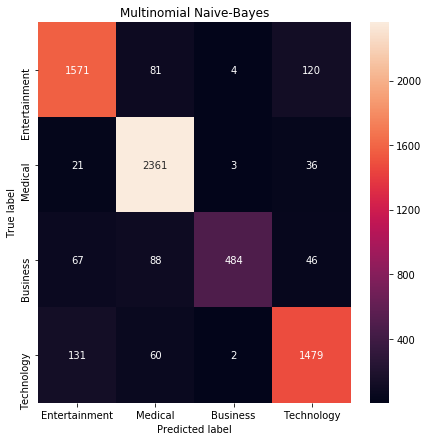

In [22]:
cm = confusion_matrix(y_test, predicted1) 
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,index = ['Entertainment','Medical','Business','Technology'], columns = ['Entertainment','Medical','Business','Technology'])
plt.figure(figsize=(7,7))
sns.heatmap(cm_df, annot=True,annot_kws={"size": 10},fmt="d")
plt.title("Multinomial Naive-Bayes")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

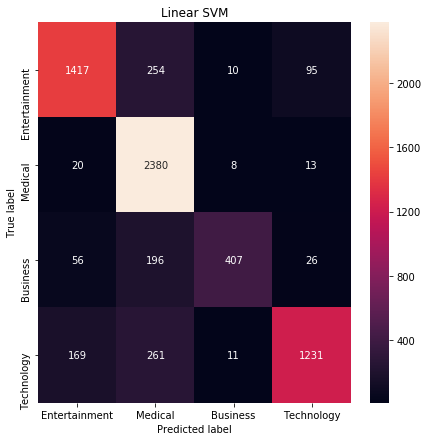

In [23]:
cm = confusion_matrix(y_test, predicted2) 
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,index = ['Entertainment','Medical','Business','Technology'], columns = ['Entertainment','Medical','Business','Technology'])
plt.figure(figsize=(7,7))
sns.heatmap(cm_df, annot=True,annot_kws={"size": 10},fmt="d")
plt.title("Linear SVM")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Why Multinomial NB perform better than Linear SVM in this case ?

If we see the accuracy, classification report, and confusion matrix. The Multinomial NB or Naives Bayes Classifier performs better than linear SVM.

There is no single answer about which is the best classification method for a given dataset. Different kinds of classifiers should be always considered for a comparative study over a given dataset. Given the properties of the dataset, you might have some clues that may give preference to some methods. However, it would still be advisable to experiment with all, if possible.

Naive Bayes Classifier (NBC) and Support Vector Machine (SVM) have different options. They are both sensitive to parameter optimization (i.e. different parameter selection can significantly change their output). So, if you have a result showing that NBC is performing better than SVM. This is only true for the selected parameters. However, for another parameter selection, you might find SVM is performing better.

In general, if the assumption of independence in NBC is satisfied by the variables of your dataset and the degree of class overlapping is small (i.e. potential linear decision boundary), NBC would be expected to achieve good. 